In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [ ]:
raw_dataset=pd.read_excel('/pima-indians-diabetes.xlsx')
raw_dataset.columns=['Pregnancies', 'Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index', 'Diabetes pedigree function',
'Age',  'Positive']

In [ ]:
raw_dataset[raw_dataset.columns].isna().sum()

Pregnancies                                0
Plasma glucose concentration          0
Diastolic blood pressure (mm Hg)      0
Triceps skin fold thickness (mm)      0
2-Hour serum insulin (mu U/ml)        0
Body mass index                       0
Diabetes pedigree function            0
Age                                   0
Positive                            323
dtype: int64

In [ ]:
raw_dataset=raw_dataset.dropna()
raw_dataset

,Pregnancies,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Positive
0,1,85,66,29,0.0,26.6,0.351,31,0.0
1,8,183,64,0,0.0,23.3,0.672,32,1.0
2,1,89,66,23,94.0,28.1,0.167,21,0.0
3,0,137,40,35,168.0,43.1,2.288,33,1.0
4,5,116,74,0,0.0,25.6,0.201,30,0.0
...,...,...,...,...,...,...,...,...,...
439,0,189,104,25,0.0,34.3,0.435,41,1.0
440,2,83,66,23,50.0,32.2,0.497,22,0.0
441,4,117,64,27,120.0,33.2,0.230,24,0.0
442,8,108,70,0,0.0,30.5,0.955,33,1.0


In [ ]:
def Mean_Normalization(X): 
 for cols in X.columns:  X[cols] = (X[cols] - X[cols].mean())/X[cols].std()
 return X

In [ ]:
Y = raw_dataset.iloc[:,-1].values
#Check for biases in data
print('Positive class count',len(Y[Y == 1]))
print('Negative class count',len(Y[Y == 0]))

Positive class count 169
Negative class count 275


The dataset is biased towards the negative class. Balancing the dataset now

In [ ]:
XDS = raw_dataset[raw_dataset['Positive']==1]
DS = raw_dataset[raw_dataset['Positive']==0]
DS1 = DS.head(169)
#Use DS2 as test dataset (optional)
DS2 = DS.tail(106)
XDS=XDS.append(DS1)
Y = XDS[XDS.columns[-1]]
XDS=XDS[XDS.columns[:-1]]
scaled = Mean_Normalization(XDS)
ones = np.ones(XDS.shape[0]).reshape(XDS.shape[0],1)
scaled.insert(0,'ones',ones)
X = scaled.iloc[:,:]
#Split data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X.values,Y.values,random_state=5,stratify=Y)

In [ ]:
# clean the index values
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)
X_train.shape

(253, 9)

Before changing degree run cells from cell number 1 since this won't refresh the previous state (X references X_train)

In [ ]:
def polynomial_transform(X,degree):
  col_count = X.columns[-1] + 1
  for column in X.columns[1:]:
    for deg in range(1,degree):
     X[col_count] = X[column]**(deg+1)
     col_count += 1
  return X
#change degree here
degree = 2
polynomial_transform(X_train,degree)
polynomial_transform(X_test,degree)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.451753,1.183287,0.949960,-1.268358,-0.635438,-0.280344,-0.526352,1.421482,2.107586,1.400167,0.902424,1.608732,0.403782,0.078593,0.277046,2.020610
1,1.0,0.268649,0.562933,0.647001,0.363369,1.559476,-0.083397,-0.097647,2.239829,0.072172,0.316894,0.418610,0.132037,2.431966,0.006955,0.009535,5.016834
2,1.0,1.451753,1.153746,0.747987,0.049576,-0.635438,-0.231107,0.985549,-0.124285,2.107586,1.331130,0.559485,0.002458,0.403782,0.053411,0.971306,0.015447
3,1.0,-0.322903,-0.411909,-0.362864,-1.268358,-0.635438,-1.240463,-0.983638,-1.124488,0.104267,0.169669,0.131670,1.608732,0.403782,1.538749,0.967543,1.264473
4,1.0,-1.210231,0.178904,-3.493445,-1.268358,-0.635438,1.295236,-0.617809,-0.669850,1.464660,0.032007,12.204161,1.608732,0.403782,1.677636,0.381688,0.448700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1.0,1.747529,0.415230,0.546014,-1.268358,-0.635438,-0.686548,2.728950,2.148901,3.053857,0.172416,0.298132,1.608732,0.403782,0.471349,7.447168,4.617778
81,1.0,-0.914455,-0.205124,-0.564837,0.990957,0.088498,0.076623,-0.643531,-0.942633,0.836229,0.042076,0.319041,0.981996,0.007832,0.005871,0.414133,0.888557
82,1.0,-0.618679,-0.736856,-0.160891,-0.013183,0.057693,0.027386,1.088438,-0.487995,0.382764,0.542956,0.025886,0.000174,0.003328,0.000750,1.184697,0.238140
83,1.0,-0.914455,-1.179966,-0.160891,0.551646,-0.635438,-0.748095,-0.386308,-0.215213,0.836229,1.392319,0.025886,0.304313,0.403782,0.559645,0.149234,0.046317


In [ ]:
def Logistic_Regression(X_train, Y_train, alpha=0.001,lambda_val=10, iter=100):
 theta = np.ones(X_train.shape[1]) /10
 theta=theta.reshape(X_train.shape[1],1)
 Rl=[]
 m= X_train.shape[0]
 for i in range(iter):
  ht = X_train.dot(theta)
  Yp = 1/(1+ np.exp(-ht)).values
  R= Yp - Y_train.values
  tsq = (theta * theta).sum()
  err = float((lambda_val/(2*m))*(tsq))
  cost = -((Y_train.values * np.log(Yp)) +((1-Y_train.values)*(np.log(1-Yp)))) +err  
  Rl.append(cost.sum())
  theta = theta - ((alpha/m) *(X_train.T.dot(R)))
  #Regularise higher order terms to prevent overfitting
  # Since square terms start from index 9 
  for t in range(9,len(theta)):
    theta.values[t] = theta.values[t] * (1-((alpha*lambda_val)/m))
 return theta, Rl, iter, Yp
params=Logistic_Regression(X_train, Y_train,0.3,1,150)

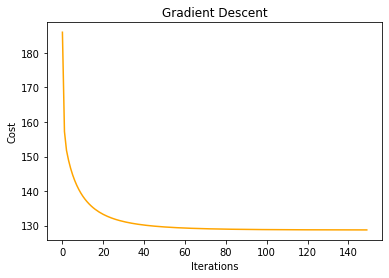

In [ ]:
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
X= np.arange(params[2])
plt.plot(X,params[1],color ='orange')
plt.show()

In [ ]:
def predict(X=X_train):
 theta = params[0]
 
 ht= (X.dot(theta))
 Y =np.array(1/(1+np.exp(-ht)))
 return Y

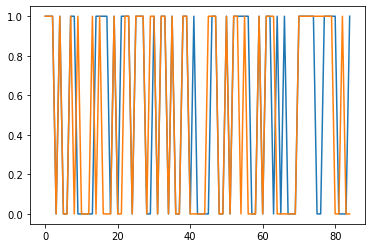

In [ ]:
# Predict using the model
X_t = X_test
Y_t = Y_test
Yp = predict(X_t)
#print(Yp)
# set threshold here
Yp[Yp>0.5] = 1
Yp[Yp<=0.5] = 0
X_terms = np.arange(X_t.shape[0])
plt.plot(X_terms, Yp)
plt.plot(X_terms, Y_t)
plt.show()

In [ ]:
Predictions = pd.DataFrame(Y_t)
Predictions.insert(1,1,Yp)
Predictions.columns=['Actual','Predicted']
# Metric calculations 
TP=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 1)].count()[0]
TN=Predictions[(Predictions['Actual'] == 0) & (Predictions['Predicted'] == 0)].count()[0]
FP=Predictions[(Predictions['Actual'] == 0 ) & (Predictions['Predicted'] == 1)].count()[0]
FN=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 0)].count()[0]
# Create the confusion Matrix 
confusion = pd.DataFrame(np.array([[TP, FP],[FN,TN]]))
confusion.columns = ['Actual_Positives','Actual_Negatives']
confusion.index = ['Predicted_Positives','Predicted_Negatives']
Predicted_Positive= TP + FP
Predicted_Negative= TN + FN
Actual_Positive= TP + FN
Actual_Negative= TN + FP
Accuracy= (TP + TN)/(Actual_Positive + Actual_Negative)
Precision= TP / Predicted_Positive
#Recall or Sensitivity
Recall = TP / Actual_Positive
Specificity = TN / Actual_Negative
F1_Score = (2*Precision * Recall) / (Precision + Recall)

In [ ]:
a = np.array([[TP, FP],[FN,TN]])
print(confusion)

                     Actual_Positives  Actual_Negatives
Predicted_Positives                35                12
Predicted_Negatives                 8                30


In [ ]:
 
print("Model performance on test data ")
 print('Accuracy: ',Accuracy)
print('Precision: ', Precision)
print('Recall: ',Recall)
print('Specificity: ', Specificity)
print('F1_score: %.2F'%F1_Score)

Model performance on test data 
Accuracy:  0.7647058823529411
Precision:  0.7446808510638298
Recall:  0.813953488372093
Specificity:  0.7142857142857143
F1_score: 0.78
